In [57]:
#prophet 예측 분석


In [91]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/df.csv')

In [92]:
df

,년,월,국적지역,입국자수,날짜,방문년월,계절
0,2022,1,그리스,390,2022-01-01,2022-01,겨울
1,2022,2,그리스,307,2022-02-01,2022-02,겨울
2,2022,3,그리스,418,2022-03-01,2022-03,봄
3,2022,4,그리스,292,2022-04-01,2022-04,봄
4,2022,5,그리스,425,2022-05-01,2022-05,봄
...,...,...,...,...,...,...,...
2872,2024,8,홍콩,61592,2024-08-01,2024-08,여름
2873,2024,9,홍콩,39815,2024-09-01,2024-09,가을
2874,2024,10,홍콩,52005,2024-10-01,2024-10,가을
2875,2024,11,홍콩,46366,2024-11-01,2024-11,가을


In [93]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [95]:
#년,월 컬럼은 삭제
df = df[['날짜', '국적지역', '입국자수']]

In [96]:
# 날짜를 인덱스로 설정
df.set_index("날짜", inplace=True)

In [97]:
df['국적지역'].unique()

array(['그리스', '나이지리아', '남아프리카공화국', '네덜란드', '네팔', '노르웨이', '뉴질랜드', '대만',
       '덴마크', '독일', '라오스', '라트비아', '러시아', '루마니아', '리투아니아', '마카오', '말레이시아',
       '멕시코', '모로코', '몽골', '미국', '미얀마', '방글라데시', '베트남', '벨기에', '불가리아',
       '브라질', '브루나이', '사우디아라비아', '스리랑카', '스웨덴', '스위스', '스페인', '슬로바키아',
       '시리아', '싱가포르', '아랍에미리트연합', '아르헨티나', '아일랜드', '에콰도르', '에티오피아', '영국',
       '오스트레일리아', '오스트리아', '요르단', '우즈베키스탄', '우크라이나', '유고슬라비아', '이라크',
       '이란', '이스라엘', '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코공화국',
       '칠레', '카자흐스탄', '캄보디아', '캐나다', '케냐', '콜롬비아', '쿠웨이트', '크로아티아',
       '키르기즈', '타지키스탄', '태국', '튀니지', '튀르키예', '파키스탄', '페루', '포르투갈', '폴란드',
       '프랑스', '핀란드', '필리핀', '헝가리', '홍콩'], dtype=object)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2877 entries, 2022-01-01 to 2024-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적지역    2877 non-null   object
 1   입국자수    2877 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.4+ KB


In [99]:
# 일본으로만 한번 해보기
target_country = "일본"
df_country = df[df['국적지역'] == target_country].copy()

In [100]:
df_country

,국적지역,입국자수
날짜,,
2022-01-01,일본,1516
2022-02-01,일본,3309
2022-03-01,일본,1697
2022-04-01,일본,2747
2022-05-01,일본,4382
2022-06-01,일본,6785
2022-07-01,일본,13069
2022-08-01,일본,28734
2022-09-01,일본,28836


In [101]:
df_prophet = df_country[['입국자수']].reset_index()


In [102]:
df_prophet

,날짜,입국자수
0,2022-01-01,1516
1,2022-02-01,3309
2,2022-03-01,1697
3,2022-04-01,2747
4,2022-05-01,4382
5,2022-06-01,6785
6,2022-07-01,13069
7,2022-08-01,28734
8,2022-09-01,28836
9,2022-10-01,68687


In [103]:
df_prophet.columns = ['ds', 'y']  # Prophet 모델용 컬럼명 변경

In [104]:
df_prophet

,ds,y
0,2022-01-01,1516
1,2022-02-01,3309
2,2022-03-01,1697
3,2022-04-01,2747
4,2022-05-01,4382
5,2022-06-01,6785
6,2022-07-01,13069
7,2022-08-01,28734
8,2022-09-01,28836
9,2022-10-01,68687


In [105]:
# Prophet 모델 학습
from prophet import Prophet

prophet_model =  Prophet(
    yearly_seasonality=True,    # 연도별 계절성 반영
    weekly_seasonality=False,   # 주별 계절성 제거
    daily_seasonality=False,    # 일별 계절성 제거
    seasonality_mode="multiplicative"  # 계절성을 곱셈 방식으로 적용 (트렌드 반영 강화)
)
prophet_model.fit(df_prophet)

15:38:58 - cmdstanpy - INFO - Chain [1] start processing


15:38:58 - cmdstanpy - INFO - Chain [1] done processing


In [106]:
# 예측할 기간 생성
future = prophet_model.make_future_dataframe(periods=24, freq='M')
forescast = prophet_model.predict(future)

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [107]:
forescast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-01-01,-42919.455754,-45010.128299,-3105.840344,-42919.455754,-42919.455754,-0.439309,-0.439309,-0.439309,-0.439309,-0.439309,-0.439309,0.0,0.0,0.0,-24064.543982
1,2022-02-01,-29587.991628,-43532.808752,-844.977823,-29587.991628,-29587.991628,-0.248581,-0.248581,-0.248581,-0.248581,-0.248581,-0.248581,0.0,0.0,0.0,-22232.973136
2,2022-03-01,-17546.669190,-45824.330704,-4078.935678,-17546.669190,-17546.669190,0.373047,0.373047,0.373047,0.373047,0.373047,0.373047,0.0,0.0,0.0,-24092.393144
3,2022-04-01,-4215.205062,-21902.502681,17720.062986,-4215.205062,-4215.205062,-0.150915,-0.150915,-0.150915,-0.150915,-0.150915,-0.150915,0.0,0.0,0.0,-3579.068299
4,2022-05-01,8686.211838,-11735.088799,30676.853019,8686.211838,8686.211838,0.073640,0.073640,0.073640,0.073640,0.073640,0.073640,0.0,0.0,0.0,9325.860374
5,2022-06-01,22017.675970,329.457383,42800.753453,22017.675970,22017.675970,0.014000,0.014000,0.014000,0.014000,0.014000,0.014000,0.0,0.0,0.0,22325.918396
6,2022-07-01,34919.146566,13348.911962,54372.091197,34919.146566,34919.146566,-0.012256,-0.012256,-0.012256,-0.012256,-0.012256,-0.012256,0.0,0.0,0.0,34491.192744
7,2022-08-01,48250.666183,36109.572452,79807.585092,48250.666183,48250.666183,0.198791,0.198791,0.198791,0.198791,0.198791,0.198791,0.0,0.0,0.0,57842.441202
8,2022-09-01,61582.185800,48378.491848,87445.873343,61582.185800,61582.185800,0.089261,0.089261,0.089261,0.089261,0.089261,0.089261,0.0,0.0,0.0,67079.072185
9,2022-10-01,74483.673039,61155.013645,104091.762771,74483.673039,74483.673039,0.112993,0.112993,0.112993,0.112993,0.112993,0.112993,0.0,0.0,0.0,82899.821069


In [108]:
# 모든 나라 예측
all_forecasts = []

In [109]:
countries = df['국적지역'].unique()

In [110]:
countries

array(['그리스', '나이지리아', '남아프리카공화국', '네덜란드', '네팔', '노르웨이', '뉴질랜드', '대만',
       '덴마크', '독일', '라오스', '라트비아', '러시아', '루마니아', '리투아니아', '마카오', '말레이시아',
       '멕시코', '모로코', '몽골', '미국', '미얀마', '방글라데시', '베트남', '벨기에', '불가리아',
       '브라질', '브루나이', '사우디아라비아', '스리랑카', '스웨덴', '스위스', '스페인', '슬로바키아',
       '시리아', '싱가포르', '아랍에미리트연합', '아르헨티나', '아일랜드', '에콰도르', '에티오피아', '영국',
       '오스트레일리아', '오스트리아', '요르단', '우즈베키스탄', '우크라이나', '유고슬라비아', '이라크',
       '이란', '이스라엘', '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코공화국',
       '칠레', '카자흐스탄', '캄보디아', '캐나다', '케냐', '콜롬비아', '쿠웨이트', '크로아티아',
       '키르기즈', '타지키스탄', '태국', '튀니지', '튀르키예', '파키스탄', '페루', '포르투갈', '폴란드',
       '프랑스', '핀란드', '필리핀', '헝가리', '홍콩'], dtype=object)

In [111]:
df

,국적지역,입국자수
날짜,,
2022-01-01,그리스,390
2022-02-01,그리스,307
2022-03-01,그리스,418
2022-04-01,그리스,292
2022-05-01,그리스,425
...,...,...
2024-08-01,홍콩,61592
2024-09-01,홍콩,39815
2024-10-01,홍콩,52005


In [112]:
df.reset_index(inplace=True)

In [113]:
df.isna().sum()

날짜      0
국적지역    0
입국자수    0
dtype: int64

In [114]:
df

,날짜,국적지역,입국자수
0,2022-01-01,그리스,390
1,2022-02-01,그리스,307
2,2022-03-01,그리스,418
3,2022-04-01,그리스,292
4,2022-05-01,그리스,425
...,...,...,...
2872,2024-08-01,홍콩,61592
2873,2024-09-01,홍콩,39815
2874,2024-10-01,홍콩,52005
2875,2024-11-01,홍콩,46366


In [115]:
# 학습 데이터의 가장 최근 날짜 찾기
latest_date = df["날짜"].max()
# 각 국가별로 Prophet 모델 학습 및 예측
for country in countries:
    # 국가별 데이터 필터링
    df_country = df[df["국적지역"] == country][["날짜", "입국자수"]].rename(columns={"날짜": "ds", "입국자수": "y"})

    # 날짜 형식 변환
    df_country["ds"] = pd.to_datetime(df_country["ds"])

    # 데이터 개수가 너무 적으면 스킵
    if df_country.shape[0] < 2:
        print(f"⚠️ {country}: 데이터 부족으로 예측 불가")
        continue

    # Prophet 모델 초기화 및 학습
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df_country)

    # 향후 24개월 예측
    future = model.make_future_dataframe(periods=24, freq="M")
    forecast = model.predict(future)

    # 미래 데이터만 선택 (과거 데이터 제거)
    forecast = forecast[forecast["ds"] > latest_date]

    # 국가명 컬럼을 개별 행에 추가
    forecast["국적지역"] = [country] * len(forecast)

    # 필요한 컬럼만 선택
    forecast = forecast[["국적지역", "ds", "yhat", "yhat_lower", "yhat_upper"]]

    # 리스트에 추가
    all_forecasts.append(forecast)

# 모든 국가의 예측 결과를 하나의 데이터프레임으로 결합
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)

# 결과 확인
print(final_forecast_df.head())




15:39:03 - cmdstanpy - INFO - Chain [1] start processing


15:39:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
15:39:03 - cmdstanpy - INFO - Chain [1] start processing
15:39:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
15:39:03 - cmdstanpy - INFO - Chain [1] start processing
15:39:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
15:39:04 - cmdstanpy - INFO - Chain [1] start processing
15:39:04 - cmdstanpy - INFO - Chain [1] done proc

  국적지역         ds         yhat   yhat_lower   yhat_upper
0  그리스 2024-12-31   807.911177   682.725219   931.692892
1  그리스 2025-01-31   979.619768   858.143234  1099.682880
2  그리스 2025-02-28  1143.278503  1016.705390  1280.573484
3  그리스 2025-03-31  1268.670436  1146.077665  1389.630137
4  그리스 2025-04-30  1029.860272   901.554104  1143.889536


In [118]:
# 모든 국가의 예측 결과를 하나의 데이터프레임으로 결합
final_forecast_df = pd.concat(all_forecasts, ignore_index=True)

In [119]:
final_forecast_df

,국적지역,ds,yhat,yhat_lower,yhat_upper
0,그리스,2024-12-31,807.911177,682.725219,931.692892
1,그리스,2025-01-31,979.619768,858.143234,1099.682880
2,그리스,2025-02-28,1143.278503,1016.705390,1280.573484
3,그리스,2025-03-31,1268.670436,1146.077665,1389.630137
4,그리스,2025-04-30,1029.860272,901.554104,1143.889536
...,...,...,...,...,...
1915,홍콩,2026-07-31,92514.585006,86462.322734,98441.231979
1916,홍콩,2026-08-31,99970.163923,93741.437694,106105.734220
1917,홍콩,2026-09-30,109266.901931,103210.510820,115027.269444
1918,홍콩,2026-10-31,117038.022454,110881.743126,122832.181468


In [120]:
final_forecast_df[final_forecast_df['국적지역']=='미국']

,국적지역,ds,yhat,yhat_lower,yhat_upper
480,미국,2024-12-31,96326.202517,86033.712333,107130.369564
481,미국,2025-01-31,106954.145159,96325.988957,117702.614217
482,미국,2025-02-28,149027.779665,138224.260660,160661.311347
483,미국,2025-03-31,170778.238487,160008.290446,182117.125064
484,미국,2025-04-30,156936.189608,146491.231551,168062.627427
485,미국,2025-05-31,160744.439883,150726.523484,171900.800008
486,미국,2025-06-30,160637.683282,149237.866985,171807.766284
487,미국,2025-07-31,142616.467860,132093.622320,153775.356824
488,미국,2025-08-31,156251.274437,145295.094283,167139.850336
489,미국,2025-09-30,164653.398764,153310.615781,175349.628148


In [121]:
#final_forecast_df를 정수형으로 만들기
final_forecast_df['yhat'] = final_forecast_df['yhat'].astype(int)

In [122]:
final_forecast_df

,국적지역,ds,yhat,yhat_lower,yhat_upper
0,그리스,2024-12-31,807,682.725219,931.692892
1,그리스,2025-01-31,979,858.143234,1099.682880
2,그리스,2025-02-28,1143,1016.705390,1280.573484
3,그리스,2025-03-31,1268,1146.077665,1389.630137
4,그리스,2025-04-30,1029,901.554104,1143.889536
...,...,...,...,...,...
1915,홍콩,2026-07-31,92514,86462.322734,98441.231979
1916,홍콩,2026-08-31,99970,93741.437694,106105.734220
1917,홍콩,2026-09-30,109266,103210.510820,115027.269444
1918,홍콩,2026-10-31,117038,110881.743126,122832.181468


In [123]:
final_forecast_df.loc[final_forecast_df['국적지역']=='일본']

,국적지역,ds,yhat,yhat_lower,yhat_upper
1320,일본,2024-12-31,262232,222202.147509,302656.829408
1321,일본,2025-01-31,346099,306458.684727,387526.274683
1322,일본,2025-02-28,440025,398227.278108,481098.531602
1323,일본,2025-03-31,419781,379437.715371,459330.228601
1324,일본,2025-04-30,412667,371553.724538,452955.389549
1325,일본,2025-05-31,414400,372958.440518,455543.727883
1326,일본,2025-06-30,427674,385533.624043,467740.017076
1327,일본,2025-07-31,431250,389775.845108,468718.844810
1328,일본,2025-08-31,431707,388768.621116,469970.700524
1329,일본,2025-09-30,474264,432482.593729,513822.593638


In [124]:
df.loc[df['국적지역']=='일본']

,날짜,국적지역,입국자수
1980,2022-01-01,일본,1516
1981,2022-02-01,일본,3309
1982,2022-03-01,일본,1697
1983,2022-04-01,일본,2747
1984,2022-05-01,일본,4382
1985,2022-06-01,일본,6785
1986,2022-07-01,일본,13069
1987,2022-08-01,일본,28734
1988,2022-09-01,일본,28836
1989,2022-10-01,일본,68687


In [125]:
#국적지역, ds를 방문년월로 (yyyy-mm-dd -> yyyymm+1), yhat을 입국자수로 변경하여 저장
final_forecast_df["방문년월"] = pd.to_datetime(final_forecast_df["ds"])
final_forecast_df["방문년월"] = final_forecast_df["방문년월"].apply(lambda x: 
    str((x.year + 1) * 100 + 1) if x.month == 12 else str(x.year * 100 + x.month + 1)
)



final_forecast_df = final_forecast_df[["국적지역", "방문년월", "yhat"]]
final_forecast_df.rename(columns={"yhat": "입국자수"}, inplace=True)

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_24247/1431108815.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_forecast_df.rename(columns={"yhat": "입국자수"}, inplace=True)


In [126]:
final_forecast_df

,국적지역,방문년월,입국자수
0,그리스,202501,807
1,그리스,202502,979
2,그리스,202503,1143
3,그리스,202504,1268
4,그리스,202505,1029
...,...,...,...
1915,홍콩,202608,92514
1916,홍콩,202609,99970
1917,홍콩,202610,109266
1918,홍콩,202611,117038


/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_24247/3969971898.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.lineplot(data=final_forecast_df, x="방문년월", y="입국자수", hue="국적지역", ci=None)


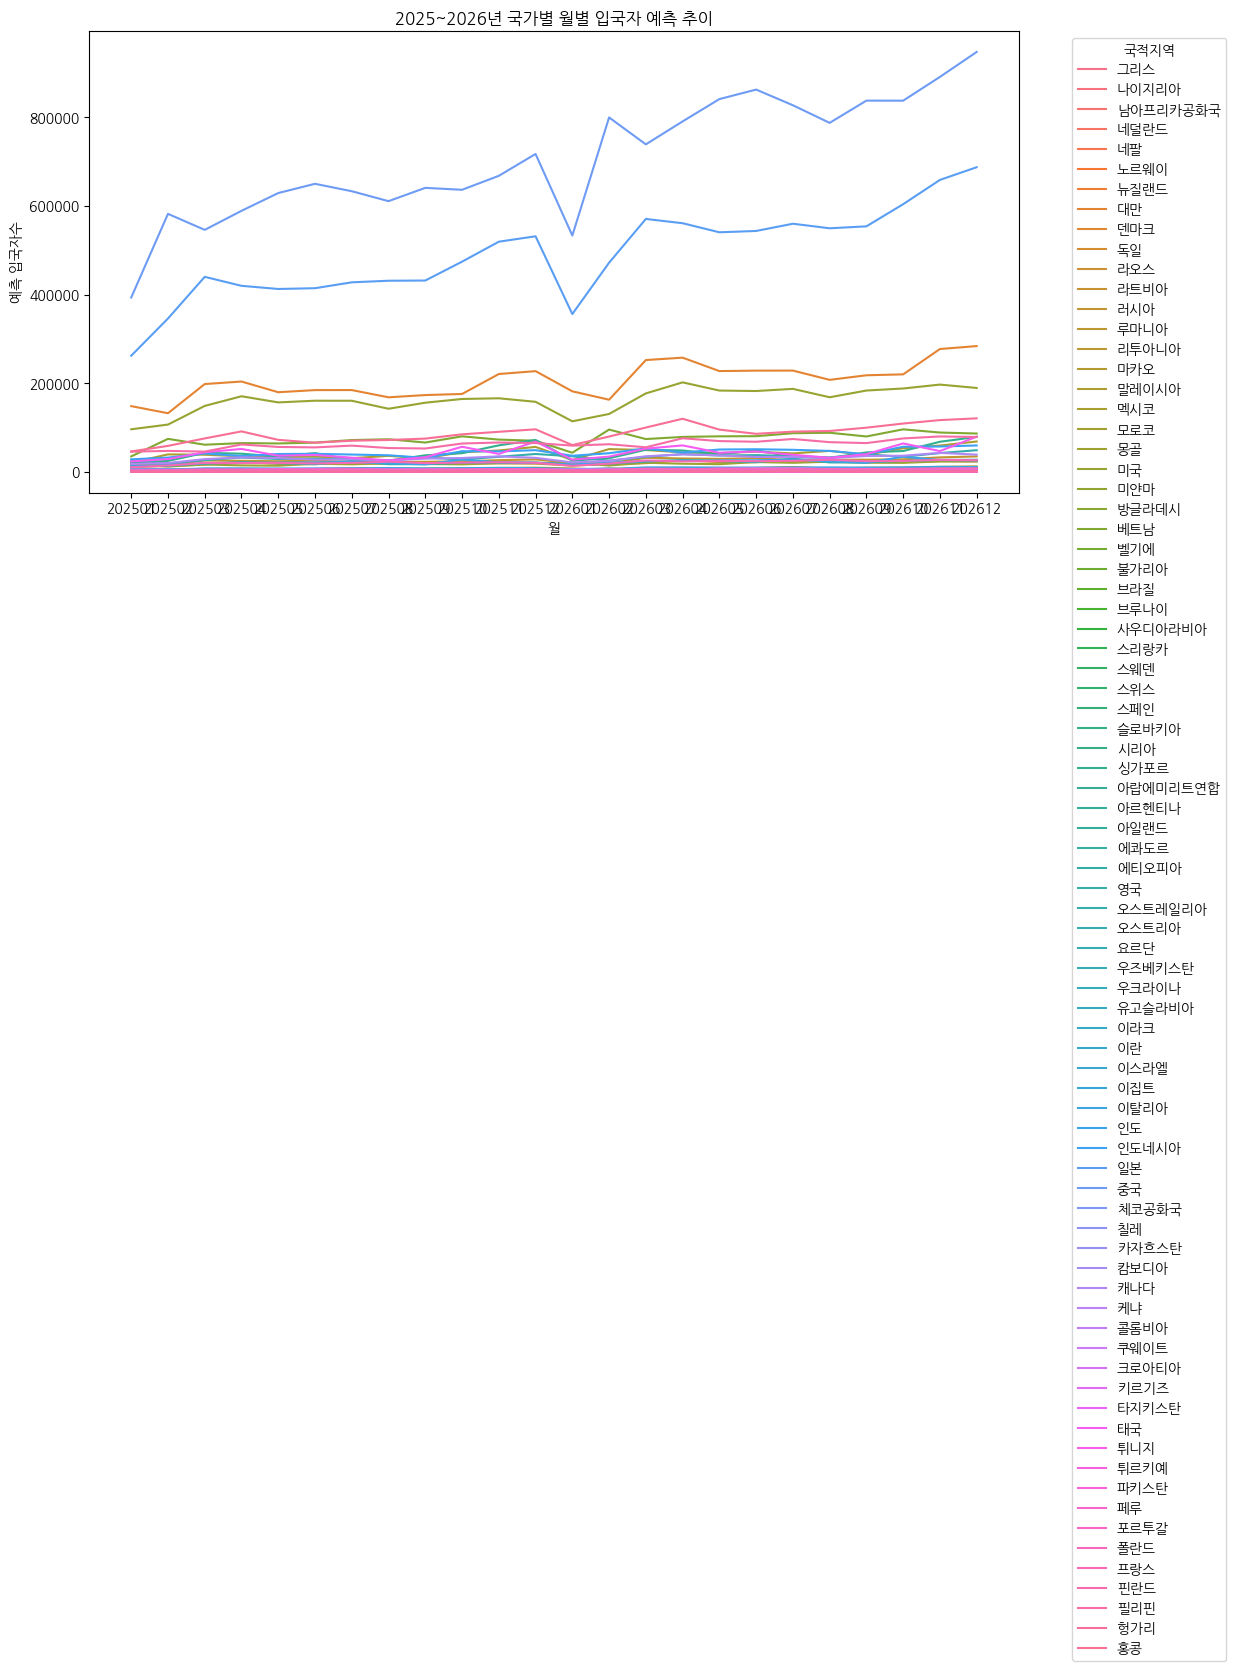

In [127]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(12, 6))
sb.lineplot(data=final_forecast_df, x="방문년월", y="입국자수", hue="국적지역", ci=None)
plt.title("2025~2026년 국가별 월별 입국자 예측 추이")
plt.xlabel("월")
plt.ylabel("예측 입국자수")
plt.legend(title="국적지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [128]:
final_forecast_df.to_csv('data/prophet_df.csv', index=False)